%md
# <center> <span style="color:indigo">        Visualización de grandes bases de datos</span> </center> 
##  <center> <span style="color:DarkBlue">          Challengue 3. </span>  </center>
##  <center> <span style="color:DarkBlue"> Hugo Fernando Abarca Jimenez </span>  </center>
##  <center> <span style="color:DarkBlue"> hugo.abarca1902@alumnos.udg.mx </span>  </center>
##  <center> <span style="color:DarkBlue"> Noviembre de 2024</span>  </center>

Para este ejercicio primero se realizó una prueba extrayendo las temperaturas de la republica mexicana , estas bases de datos fueron extraidas de Weather Stack. Pero al ser poca información, iba a quedar muy sencilla la practica.

In [0]:
import requests
import json
from datetime import datetime
import time

estados_mexico = [
    "Aguascalientes", "Baja California", "Baja California Sur", "Campeche", 
    "Chiapas", "Chihuahua", "Ciudad de México", "Coahuila", "Colima", 
    "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "Estado de México", 
    "Michoacán", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla", 
    "Querétaro", "Quintana Roo", "San Luis Potosí", "Sinaloa", "Sonora", 
    "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz", "Yucatán", "Zacatecas"
]

api_key = "7b64114cd06e7d4148e9729d2f1bf1a4" 
base_url = "http://api.weatherstack.com/current"

def fetch_weather_data(estados):
    weather_data_list = []
    for estado in estados:
        params = {
            "access_key": api_key,
            "query": estado,
        }
        response = requests.get(base_url, params=params)
        data = response.json()
        if "current" in data:
            weather_info = {
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "state": estado,
                "temperature": data["current"]["temperature"],
                "weather_descriptions": data["current"]["weather_descriptions"],
            }
            weather_data_list.append(weather_info)
        else:
            print(f"Error obteniendo datos para {estado}: {data}")
    return weather_data_list

# Prueba la función
weather_data = fetch_weather_data(estados_mexico)
print(weather_data)

[{'timestamp': '2024-11-18 23:11:26', 'state': 'Aguascalientes', 'temperature': 25, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:26', 'state': 'Baja California', 'temperature': 23, 'weather_descriptions': ['Patchy rain nearby']}, {'timestamp': '2024-11-18 23:11:27', 'state': 'Baja California Sur', 'temperature': 23, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:27', 'state': 'Campeche', 'temperature': 29, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:27', 'state': 'Chiapas', 'temperature': 23, 'weather_descriptions': ['Patchy rain nearby']}, {'timestamp': '2024-11-18 23:11:28', 'state': 'Chihuahua', 'temperature': 19, 'weather_descriptions': ['Sunny']}, {'timestamp': '2024-11-18 23:11:28', 'state': 'Ciudad de México', 'temperature': 25, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:28', 'state': 'Coahuila', 'temperature': 27, 'weather_descriptions': ['Partly cloudy']

In [0]:
dbutils.fs.mkdirs("/FileStore/tables/weather_data/")
print("Carpeta creada exitosamente.")

Carpeta creada exitosamente.


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/weather_data_gdl/")
print("Carpeta creada exitosamente.")

Carpeta creada exitosamente.


In [0]:
display(dbutils.fs.ls("/FileStore/tables/"))

path,name,size,modificationTime
dbfs:/FileStore/tables/8__Dataframes_y_Datasets_en_Databricks.dbc,8__Dataframes_y_Datasets_en_Databricks.dbc,19557,1727532429000
dbfs:/FileStore/tables/globalterrorismdb_0718dist-1.csv,globalterrorismdb_0718dist-1.csv,162812896,1731862895000
dbfs:/FileStore/tables/globalterrorismdb_0718dist.csv,globalterrorismdb_0718dist.csv,162812896,1731862806000
dbfs:/FileStore/tables/weather_data/,weather_data/,0,0
dbfs:/FileStore/tables/winequality.names,winequality.names,3305,1731943671000
dbfs:/FileStore/tables/winequality_red-1.csv,winequality_red-1.csv,84199,1731944091000
dbfs:/FileStore/tables/winequality_red.csv,winequality_red.csv,84199,1731943661000
dbfs:/FileStore/tables/winequality_white-1.csv,winequality_white-1.csv,264426,1731943993000
dbfs:/FileStore/tables/winequality_white.csv,winequality_white.csv,264426,1731943661000


In [0]:

# Define la ruta donde guardar los datos
directory_path = "/dbfs/FileStore/tables/weather_data/"
if not any(f.name == "weather_data/" for f in dbutils.fs.ls("/FileStore/tables/")):
    dbutils.fs.mkdirs(directory_path)

# Guarda cada registro como un archivo JSON
for record in weather_data:
    file_name = f"{directory_path}weather_{record['state']}_{int(time.time())}.json"
    json_data = json.dumps(record)
    dbutils.fs.put(file_name, json_data)
    print(f"Datos guardados en: {file_name}")

Wrote 125 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Aguascalientes_1731972107.json
Wrote 131 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Baja California_1731972107.json
Wrote 130 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Baja California Sur_1731972107.json
Wrote 119 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Campeche_1731972108.json
Wrote 123 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Chiapas_1731972108.json
Wrote 112 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Chihuahua_1731972108.json
Wrote 132 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Ciudad de México_1731972108.json
Wrote 119 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Coahuila_1731972108.json
Wrote 117 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Colima_1731972108.json
Wrote 109 bytes.

In [0]:
display(dbutils.fs.ls('/dbfs/FileStore/tables/weather_data/'))

path,name,size,modificationTime
dbfs:/dbfs/FileStore/tables/weather_data/weather_Aguascalientes_1731972107.json,weather_Aguascalientes_1731972107.json,125,1731972108000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Baja California Sur_1731972107.json,weather_Baja California Sur_1731972107.json,130,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Baja California_1731972107.json,weather_Baja California_1731972107.json,131,1731972108000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Campeche_1731972108.json,weather_Campeche_1731972108.json,119,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Chiapas_1731972108.json,weather_Chiapas_1731972108.json,123,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Chihuahua_1731972108.json,weather_Chihuahua_1731972108.json,112,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Ciudad de México_1731972108.json,weather_Ciudad de México_1731972108.json,132,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Coahuila_1731972108.json,weather_Coahuila_1731972108.json,119,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Colima_1731972108.json,weather_Colima_1731972108.json,117,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Durango_1731972108.json,weather_Durango_1731972108.json,109,1731972109000


In [0]:
from pyspark.sql.types import *
input_path="/dbfs/FileStore/tables/weather_data/"

jsonSchema = StructType([
    StructField("timestamp", TimestampType(), True),   
    StructField("state", StringType(), True),         
    StructField("temperature", DoubleType(), True),  
    StructField("weather_descriptions", ArrayType(StringType()), True) 
])

streaming_df = (spark.read\
    .schema(jsonSchema) \
    .json(input_path))

display(streaming_df)



timestamp,state,temperature,weather_descriptions
2024-11-18T23:11:28.000+0000,Ciudad de México,25.0,List(Partly cloudy)
2024-11-18T23:11:26.000+0000,Baja California,23.0,List(Patchy rain nearby)
2024-11-18T23:11:27.000+0000,Baja California Sur,23.0,List(Partly cloudy)
2024-11-18T23:11:31.000+0000,Michoacán,22.0,List(Light rain shower)
2024-11-18T23:11:30.000+0000,Estado de México,28.0,List(Overcast )
2024-11-18T23:11:33.000+0000,Quintana Roo,24.0,List(Light rain shower)
2024-11-18T23:11:26.000+0000,Aguascalientes,25.0,List(Partly cloudy)
2024-11-18T23:11:33.000+0000,Querétaro,25.0,List(Partly cloudy)
2024-11-18T23:11:33.000+0000,San Luis Potosí,20.0,List(Cloudy )
2024-11-18T23:11:27.000+0000,Chiapas,23.0,List(Patchy rain nearby)


In [0]:
from pyspark.sql.functions import *

windowed_df = streaming_df.groupBy(
    window(col("timestamp"), "1 hour"), col("state")
).agg(
    avg("temperature").alias("avg_temperature") 
)

windowed_df.createOrReplaceTempView("windowed_weather_data")

In [0]:
%sql select * from windowed_weather_data

window,state,avg_temperature
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Baja California,23.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Michoacán,22.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Baja California Sur,23.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Ciudad de México,25.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Querétaro,25.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Estado de México,28.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Aguascalientes,25.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Quintana Roo,24.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Zacatecas,23.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",San Luis Potosí,20.0


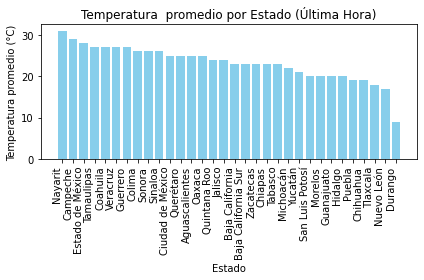

In [0]:

temperature_data = spark.sql("""
    SELECT 
        state, 
        avg_temperature 
    FROM windowed_weather_data
    ORDER BY avg_temperature DESC
""").toPandas()

import matplotlib.pyplot as plt

# Crear el gráfico
plt.bar(temperature_data['state'], temperature_data['avg_temperature'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Temperatura  promedio por Estado (Última Hora)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



Ya para la prueba real, se bajo una base de datos de registro de temperatura de Morelia del estado de Michoacan, que van desde enero del 2015 hasta octubre del 2024, estos dataset registran la temperatura diaria y vienen almacenadas por mes. En el siguiente código podemos ver los csv dentro de la carpeta

In [0]:
display(dbutils.fs.ls('dbfs:/FileStore/tables/data_challenge_3/'))

path,name,size,modificationTime
dbfs:/FileStore/tables/data_challenge_3/2015_08_more_hora_L1.csv,2015_08_more_hora_L1.csv,45996,1732405768000
dbfs:/FileStore/tables/data_challenge_3/2015_09_more_hora_L1.csv,2015_09_more_hora_L1.csv,45891,1732405768000
dbfs:/FileStore/tables/data_challenge_3/2015_10_more_hora_L1.csv,2015_10_more_hora_L1.csv,47287,1732405769000
dbfs:/FileStore/tables/data_challenge_3/2015_11_more_hora_L1.csv,2015_11_more_hora_L1.csv,45801,1732405769000
dbfs:/FileStore/tables/data_challenge_3/2015_12_more_hora_L1.csv,2015_12_more_hora_L1.csv,47273,1732405769000
dbfs:/FileStore/tables/data_challenge_3/2016_01_more_hora_L1.csv,2016_01_more_hora_L1.csv,47305,1732405769000
dbfs:/FileStore/tables/data_challenge_3/2016_02_more_hora_L1.csv,2016_02_more_hora_L1.csv,44193,1732405769000
dbfs:/FileStore/tables/data_challenge_3/2016_03_more_hora_L1.csv,2016_03_more_hora_L1.csv,47521,1732405769000
dbfs:/FileStore/tables/data_challenge_3/2016_04_more_hora_L1.csv,2016_04_more_hora_L1.csv,46058,1732405770000
dbfs:/FileStore/tables/data_challenge_3/2016_05_more_hora_L1.csv,2016_05_more_hora_L1.csv,47540,1732405770000


Con el siguiente código se trató de ver la estructura de la tabla, pero se tuvo que adicionar otra linea de código por que en la segunda fila nos aparecía el tipo de dato de las columnas.

In [0]:
file_path = 'dbfs:/FileStore/tables/data_challenge_3/2015_08_more_hora_L1.csv'
rdd = spark.sparkContext.textFile(file_path).zipWithIndex().filter(lambda x: x[1] >= 2).map(lambda x: x[0])
df = spark.read.option("header", "true").csv(rdd)
df.show()

+-------------------+---------------+--------------+
|      Lat 19.6493 N| Lon 101.2221 W| Alt 1936 masl|
+-------------------+---------------+--------------+
|        Time UTC-6h|           null|          null|
|Meteorological data|           null|          null|
|          TIMESTAMP|       Temp_Avg|        RH_Avg|
|yyyy-mm-dd HH:MM:SS|             �C|             %|
|2015-08-01 00:00:00|           null|          null|
|2015-08-01 01:00:00|           null|          null|
|2015-08-01 02:00:00|           null|          null|
|2015-08-01 03:00:00|           null|          null|
|2015-08-01 04:00:00|           null|          null|
|2015-08-01 05:00:00|           null|          null|
|2015-08-01 06:00:00|           null|          null|
|2015-08-01 07:00:00|           null|          null|
|2015-08-01 08:00:00|           null|          null|
|2015-08-01 09:00:00|           null|          null|
|2015-08-01 10:00:00|           null|          null|
|2015-08-01 11:00:00|           null|         

| **Columna**         | **Unidad**     |
|---------------------|----------------|
| TIMESTAMP           | -              |
| Temp_Avg            | °C             |
| RH_Avg              | %              |
| WSpeed_Avg          | m/s            |
| WSpeed_Max          | m/s            |
| WDir_Avg            | grados (°)     |
| Rain_Tot            | mm             |
| Press_Avg           | hPa            |
| Rad_Avg             | W/m²           |


Con este código podemos observar ya una lectura mejor estrucutrada, ya de este modo nos es funcional para realizar el streaming.

In [0]:
file_path = 'dbfs:/FileStore/tables/data_challenge_3/2015_08_more_hora_L1.csv'
rdd = spark.sparkContext.textFile(file_path).zipWithIndex().filter(lambda x: x[1] >= 6).map(lambda x: x[0])
df = spark.read.option("header", "true").csv(rdd)
df_cleaned = df.rdd.zipWithIndex().filter(lambda x: x[1] > 0).map(lambda x: x[0]).toDF(df.columns)
df_cleaned.show()


+-------------------+--------+------+----------+----------+--------+--------+---------+-------+
|          TIMESTAMP|Temp_Avg|RH_Avg|WSpeed_Avg|WSpeed_Max|WDir_Avg|Rain_Tot|Press_Avg|Rad_Avg|
+-------------------+--------+------+----------+----------+--------+--------+---------+-------+
|2015-08-01 00:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 01:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 02:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 03:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 04:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 05:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 06:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-01 07:00:00|    null|  null|   

En esta linea se utilizo el código anterior para arreglar la estrucutra de las bases de datos, se tuvieron que guardar nuevamente los datos en una nueva carpeta llamada data_challenge_3_cleaned, ya que en el streaming se tuvieron muchos problemas a la hora de procesar los datos

In [0]:
folder_path = 'dbfs:/FileStore/tables/data_challenge_3/'
files = dbutils.fs.ls(folder_path)
csv_files = [file.path for file in files if file.name.endswith('.csv')]

def clean_and_overwrite_csv(file_path):
    try:
        rdd = spark.sparkContext.textFile(file_path).zipWithIndex().filter(lambda x: x[1] >= 6).map(lambda x: x[0])
        df = spark.read.option("header", "true").csv(rdd)
        df_cleaned = df.rdd.zipWithIndex().filter(lambda x: x[1] > 0).map(lambda x: x[0]).toDF(df.columns)
        output_path = file_path.replace("data_challenge_3", "data_challenge_3_cleaned")  
        df_cleaned.write.option("header", "true").csv(output_path, mode="overwrite") 
        
        print(f"Archivo limpio y sobrescrito: {file_path}")
        
    except Exception as e:
        print(f"Error al procesar el archivo {file_path}: {e}")

for csv_file in csv_files:
    clean_and_overwrite_csv(csv_file)

Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2015_08_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2015_09_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2015_10_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2015_11_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2015_12_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2016_01_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2016_02_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2016_03_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2016_04_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tables/data_challenge_3/2016_05_more_hora_L1.csv
Archivo limpio y sobrescrito: dbfs:/FileStore/tabl

Solo se corrobora que si se hayan guardado los csv dentro de nuestra carpeta data_challenge_3_cleaned

In [0]:
display(dbutils.fs.ls('dbfs:/FileStore/tables/data_challenge_3_cleaned/'))

path,name,size,modificationTime
dbfs:/FileStore/tables/data_challenge_3_cleaned/2015_08_more_hora_L1.csv/,2015_08_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2015_09_more_hora_L1.csv/,2015_09_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2015_10_more_hora_L1.csv/,2015_10_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2015_11_more_hora_L1.csv/,2015_11_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2015_12_more_hora_L1.csv/,2015_12_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2016_01_more_hora_L1.csv/,2016_01_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2016_02_more_hora_L1.csv/,2016_02_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2016_03_more_hora_L1.csv/,2016_03_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2016_04_more_hora_L1.csv/,2016_04_more_hora_L1.csv/,0,0
dbfs:/FileStore/tables/data_challenge_3_cleaned/2016_05_more_hora_L1.csv/,2016_05_more_hora_L1.csv/,0,0


Si leemos un archivo tomado al azar podemos ver que ya viene una estructura mas amigable para procesar.

In [0]:
file_path = 'dbfs:/FileStore/tables/data_challenge_3_cleaned/2015_08_more_hora_L1.csv'
df = spark.read.option("header", "true").csv(file_path)
df.show(5)

+-------------------+--------+------+----------+----------+--------+--------+---------+-------+
|          TIMESTAMP|Temp_Avg|RH_Avg|WSpeed_Avg|WSpeed_Max|WDir_Avg|Rain_Tot|Press_Avg|Rad_Avg|
+-------------------+--------+------+----------+----------+--------+--------+---------+-------+
|2015-08-16 18:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-16 19:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-16 20:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-16 21:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
|2015-08-16 22:00:00|    null|  null|      null|      null|    null|    null|     null|   null|
+-------------------+--------+------+----------+----------+--------+--------+---------+-------+
only showing top 5 rows



In [0]:
df.groupBy("Temp_Avg").count().show()

+--------+-----+
|Temp_Avg|count|
+--------+-----+
|   15.41|    3|
|   15.49|    1|
|   14.49|    1|
|   15.35|    2|
|   23.19|    1|
|   18.84|    1|
|   13.73|    1|
|   21.47|    1|
|   24.62|    1|
|   24.11|    1|
|   15.53|    1|
|   15.92|    1|
|   15.59|    1|
|   18.28|    2|
|   23.28|    1|
|   23.66|    1|
|   17.78|    1|
|    21.5|    1|
|    17.6|    1|
|   21.62|    1|
+--------+-----+
only showing top 20 rows



Vemos que estructura tienen los datos

In [0]:
df.printSchema()

root
 |-- TIMESTAMP: string (nullable = true)
 |-- Temp_Avg: string (nullable = true)
 |-- RH_Avg: string (nullable = true)
 |-- WSpeed_Avg: string (nullable = true)
 |-- WSpeed_Max: string (nullable = true)
 |-- WDir_Avg: string (nullable = true)
 |-- Rain_Tot: string (nullable = true)
 |-- Press_Avg: string (nullable = true)
 |-- Rad_Avg: string (nullable = true)



In [0]:
 df.filter(df['Temp_Avg'] == 'null')

Out[39]: DataFrame[TIMESTAMP: string, Temp_Avg: string, RH_Avg: string, WSpeed_Avg: string, WSpeed_Max: string, WDir_Avg: string, Rain_Tot: string, Press_Avg: string, Rad_Avg: string]

Este código permite ir guardando los nuevos datos que vallan llegando a la carpeta. pero por le momento solo se tenian datos hasta el mes de noviembre.

In [0]:
from pyspark.sql.types import *
input_path = "dbfs:/FileStore/tables/data_challenge_3_cleaned/**/*.csv"

csvSchema = StructType([
    StructField("TIMESTAMP", StringType(), True),
    StructField("Temp_Avg", DoubleType(), True),
    StructField("RH_Avg", DoubleType(), True),
    StructField("WSpeed_Avg", DoubleType(), True),
    StructField("WSpeed_Max", DoubleType(), True),
    StructField("WDir_Avg", DoubleType(), True),
    StructField("Rain_Tot", DoubleType(), True),
    StructField("Press_Avg", DoubleType(), True),
    StructField("Rad_Avg", DoubleType(), True)
])


streaming_df = (spark.readStream
    .format("csv")  
    .option("header", "true")  
    .schema(csvSchema)  
    .load(input_path) 
)

streaming_df.printSchema()
display(streaming_df)
query = (streaming_df.writeStream
         .outputMode("append") 
         .format("console")  
         .start())

query.awaitTermination(60)  


TIMESTAMP,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,Rain_Tot,Press_Avg,Rad_Avg
2021-12-16 10:00:00,13.32,65.11,0.668,2.017,205.2,0.0,807.803,455.697
2021-12-16 11:00:00,16.28,52.34,0.843,2.181,203.2,0.0,807.693,651.387
2021-12-16 12:00:00,19.1,42.82,1.426,3.85,155.7,0.0,807.187,782.337
2021-12-16 13:00:00,21.16,35.1,2.496,4.905,170.1,0.0,806.366,829.117
2021-12-16 14:00:00,22.31,33.26,2.001,6.113,160.5,0.0,805.268,792.213
2021-12-16 15:00:00,22.66,31.57,1.375,3.789,46.9,0.0,804.416,511.457
2021-12-16 16:00:00,23.49,29.21,1.887,3.983,229.0,0.0,803.797,535.728
2021-12-16 17:00:00,23.8,27.63,0.663,2.529,165.9,0.0,803.355,305.417
2021-12-16 18:00:00,21.89,41.13,1.705,5.171,247.5,0.0,803.436,78.399
2021-12-16 19:00:00,18.99,59.68,1.27,4.209,352.9,0.0,804.09,0.303


Guardamos los datos en un archivo parquet para que pueda ser graficado

In [0]:
from pyspark.sql.types import *
input_path = "dbfs:/FileStore/tables/data_challenge_3_cleaned/**/*.csv"
csvSchema = StructType([
    StructField("TIMESTAMP", StringType(), True),
    StructField("Temp_Avg", DoubleType(), True),
    StructField("RH_Avg", DoubleType(), True),
    StructField("WSpeed_Avg", DoubleType(), True),
    StructField("WSpeed_Max", DoubleType(), True),
    StructField("WDir_Avg", DoubleType(), True),
    StructField("Rain_Tot", DoubleType(), True),
    StructField("Press_Avg", DoubleType(), True),
    StructField("Rad_Avg", DoubleType(), True)
])
streaming_df = (spark.readStream
    .format("csv") 
    .option("header", "true") 
    .schema(csvSchema)  
    .load(input_path)  
)

output_path = "dbfs:/FileStore/tables/output_parquet/"
query = (streaming_df.writeStream
         .outputMode("append")  
         .format("parquet")  
         .option("path", output_path) 
         .option("checkpointLocation", "dbfs:/FileStore/tables/checkpoints/") 
         .trigger(once=True) 
         .start())
query.awaitTermination()

In [0]:
parquet_df = spark.read.format("parquet").load(output_path)

In [0]:
df_pandas = parquet_df.toPandas()
df_pandas

,TIMESTAMP,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,Rain_Tot,Press_Avg,Rad_Avg
0,2021-12-16 10:00:00,13.32,65.11,0.668,2.017,205.2,0.0,807.803,455.697
1,2021-12-16 11:00:00,16.28,52.34,0.843,2.181,203.2,0.0,807.693,651.387
2,2021-12-16 12:00:00,19.10,42.82,1.426,3.850,155.7,0.0,807.187,782.337
3,2021-12-16 13:00:00,21.16,35.10,2.496,4.905,170.1,0.0,806.366,829.117
4,2021-12-16 14:00:00,22.31,33.26,2.001,6.113,160.5,0.0,805.268,792.213
...,...,...,...,...,...,...,...,...,...
72194,2019-02-28 19:00:00,23.24,40.78,3.686,7.516,168.5,0.0,803.070,51.300
72195,2019-02-28 20:00:00,21.70,45.09,3.376,7.834,172.8,0.0,803.956,-1.400
72196,2019-02-28 21:00:00,20.57,48.64,1.218,3.768,167.4,0.0,805.006,-1.700
72197,2019-02-28 22:00:00,19.84,49.43,2.435,5.724,232.1,0.0,805.280,-2.000


Comportamiento de la temperatura promedio a travéz del tiempo en el estado de Michoacan.

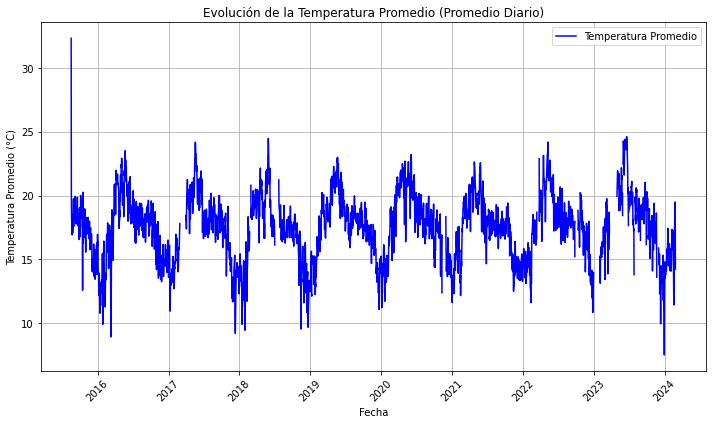

In [0]:
import pandas as pd
df_pandas['TIMESTAMP'] = pd.to_datetime(df_pandas['TIMESTAMP'])
df_resampled = df_pandas.resample('D', on='TIMESTAMP').mean()  

plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Temp_Avg'], label='Temperatura Promedio', color='b')
plt.title('Evolución de la Temperatura Promedio (Promedio Diario)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Podemos ver el comportamiento de los vientos en el año 2024

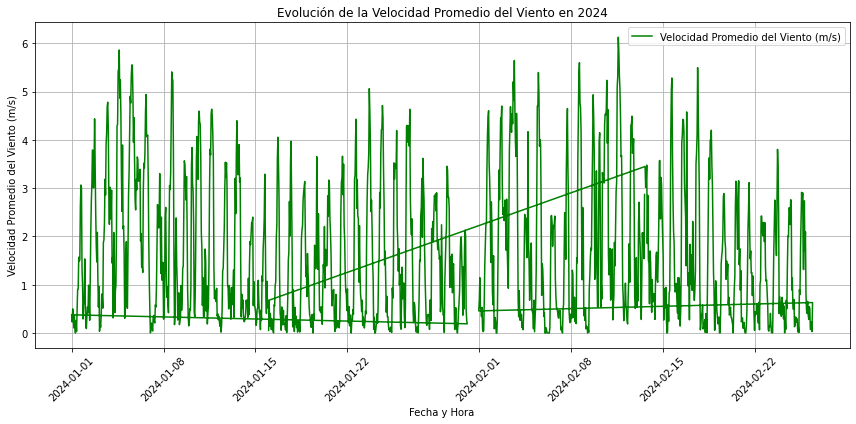

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_2024['TIMESTAMP'], df_2024['WSpeed_Avg'], label='Velocidad Promedio del Viento (m/s)', color='g')
plt.title('Evolución de la Velocidad Promedio del Viento en 2024')
plt.xlabel('Fecha y Hora')
plt.ylabel('Velocidad Promedio del Viento (m/s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Análisis para ver las temperaturas seccionadas en frio, caliente y moderado en el año 2024

<command-906589964751618>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Season'] = df_2024['Temp_Avg'].apply(


          count       mean       std    min      25%    50%      75%    max
Season                                                                     
Caliente   55.0  26.524545  1.102918  25.04  25.6400  26.24  27.3500  28.97
Fría      666.0  10.867042  2.427628   4.51   9.1125  10.94  12.8575  14.98
Moderada  614.0  19.383746  2.718328  15.00  17.0675  19.20  21.4775  24.96


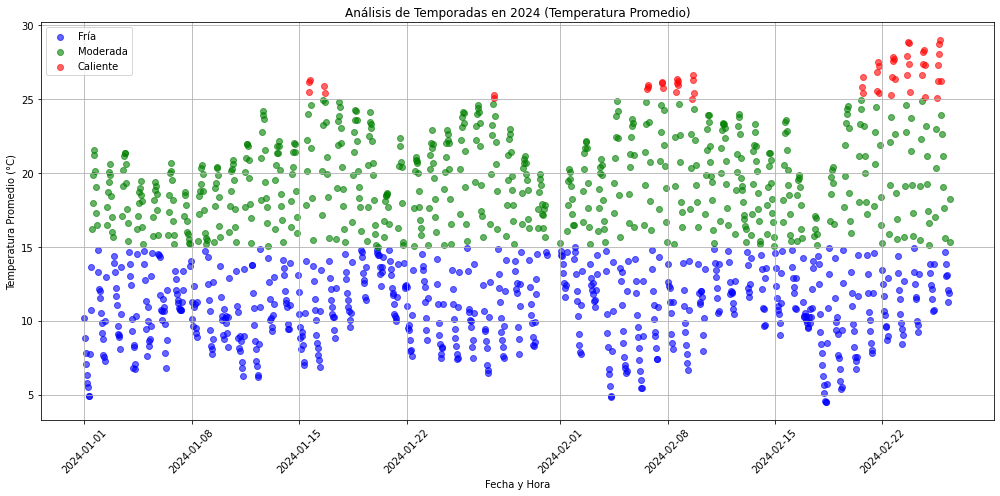

In [0]:
import matplotlib.pyplot as plt
cold_threshold = 15  # Temperatura para temporada fría
hot_threshold = 25   # Temperatura para temporada caliente
df_2024['Season'] = df_2024['Temp_Avg'].apply(
    lambda x: 'Fría' if x < cold_threshold else ('Caliente' if x > hot_threshold else 'Moderada')
)
season_stats = df_2024.groupby('Season')['Temp_Avg'].describe()
print(season_stats)

plt.figure(figsize=(14, 7))
cold = df_2024[df_2024['Season'] == 'Fría']
plt.scatter(cold['TIMESTAMP'], cold['Temp_Avg'], label='Fría', color='blue', alpha=0.6)
moderate = df_2024[df_2024['Season'] == 'Moderada']
plt.scatter(moderate['TIMESTAMP'], moderate['Temp_Avg'], label='Moderada', color='green', alpha=0.6)
hot = df_2024[df_2024['Season'] == 'Caliente']
plt.scatter(hot['TIMESTAMP'], hot['Temp_Avg'], label='Caliente', color='red', alpha=0.6)
plt.title('Análisis de Temporadas en 2024 (Temperatura Promedio)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Análisis de temperatura a lo largo del 2020 hasta el 2024. Podemos ver que las temperaturas en Morelia es un municipio muy Extremista, tiene temperaturas muy frias y en ocasiones alcanza temperaturas muy altas.

                count       mean       std  ...     50%      75%    max
Year Season                                 ...                        
2015 Caliente    64.0  25.732031  0.977399  ...  25.505  25.9775  32.32
     Fría      1024.0  12.539707  1.867787  ...  12.905  14.0800  14.99
     Moderada  2114.0  19.184678  2.792359  ...  18.880  21.4675  25.00
2016 Caliente   526.0  26.660837  1.297054  ...  26.370  27.4275  31.57
     Fría      2706.0  11.677997  2.648259  ...  12.280  13.9000  14.99
     Moderada  5529.0  19.220307  2.780494  ...  18.950  21.5000  25.00
2017 Caliente   486.0  26.684156  1.330959  ...  26.340  27.5375  30.98
     Fría      2481.0  11.160665  2.904600  ...  11.720  13.7800  14.99
     Moderada  5026.0  19.291773  2.788078  ...  19.040  21.5100  25.00
2018 Caliente   460.0  26.789543  1.576098  ...  26.375  27.4800  33.20
     Fría      2757.0  11.703674  2.787488  ...  12.480  14.0400  14.99
     Moderada  4884.0  19.112217  2.735948  ...  18.860  21.2600

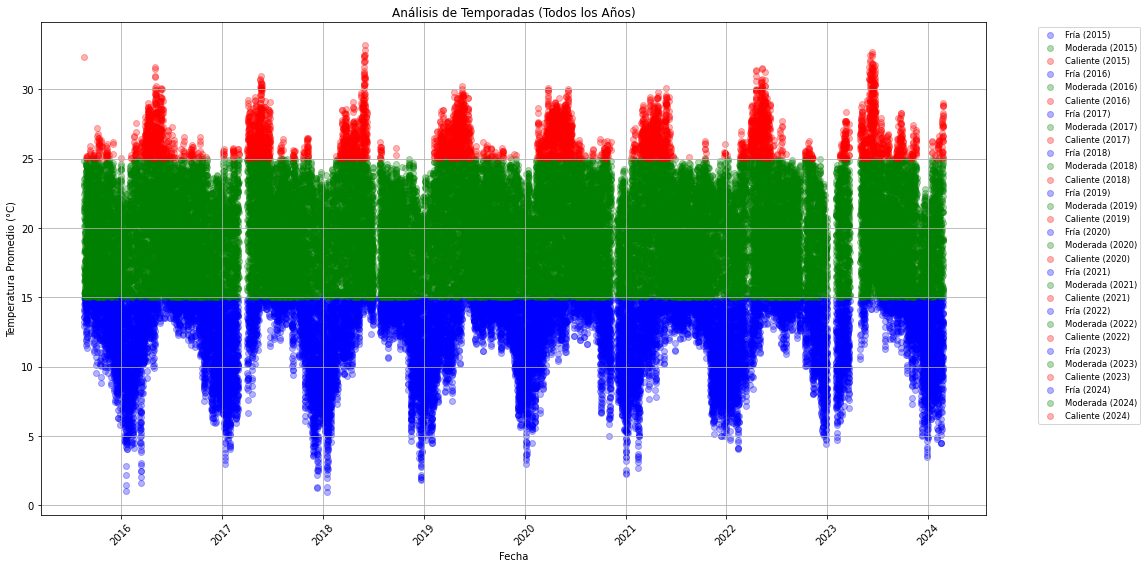

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
df_pandas['TIMESTAMP'] = pd.to_datetime(df_pandas['TIMESTAMP'])
df_pandas['Year'] = df_pandas['TIMESTAMP'].dt.year
cold_threshold = 15  # Temperatura para temporada fría
hot_threshold = 25   # Temperatura para temporada caliente
df_pandas['Season'] = df_pandas['Temp_Avg'].apply(
    lambda x: 'Fría' if x < cold_threshold else ('Caliente' if x > hot_threshold else 'Moderada')
)
season_stats = df_pandas.groupby(['Year', 'Season'])['Temp_Avg'].describe()
print(season_stats)
years = df_pandas['Year'].unique()
plt.figure(figsize=(16, 8))

for year in sorted(years):
    df_year = df_pandas[df_pandas['Year'] == year]
    cold = df_year[df_year['Season'] == 'Fría']
    plt.scatter(cold['TIMESTAMP'], cold['Temp_Avg'], label=f'Fría ({year})', color='blue', alpha=0.3)
    moderate = df_year[df_year['Season'] == 'Moderada']
    plt.scatter(moderate['TIMESTAMP'], moderate['Temp_Avg'], label=f'Moderada ({year})', color='green', alpha=0.3)
    hot = df_year[df_year['Season'] == 'Caliente']
    plt.scatter(hot['TIMESTAMP'], hot['Temp_Avg'], label=f'Caliente ({year})', color='red', alpha=0.3)
plt.title('Análisis de Temporadas (Todos los Años)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()



Por ultimo podemos observar el comportamiento promedio por año comparado con la velocidad del viento.

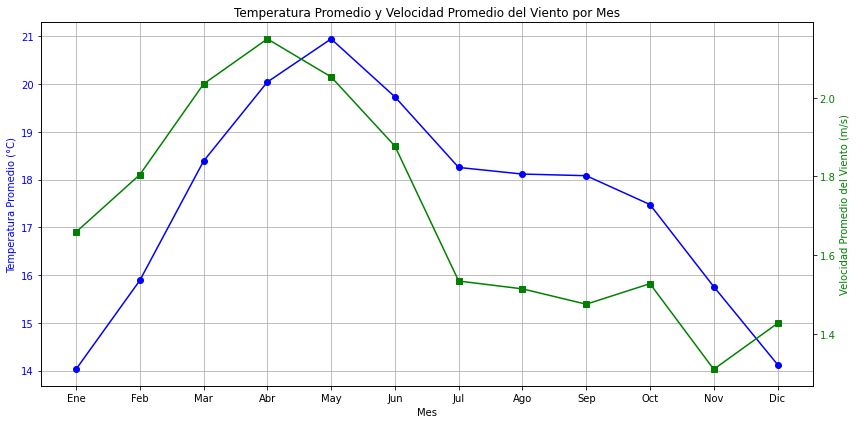

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

df_pandas['TIMESTAMP'] = pd.to_datetime(df_pandas['TIMESTAMP'])
df_pandas['Month'] = df_pandas['TIMESTAMP'].dt.month
monthly_avg_temp = df_pandas.groupby('Month')['Temp_Avg'].mean()
monthly_avg_wspeed = df_pandas.groupby('Month')['WSpeed_Avg'].mean()
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-', color='b', label='Temperatura Promedio (°C)')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Temperatura Promedio (°C)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(monthly_avg_wspeed.index, monthly_avg_wspeed.values, marker='s', linestyle='-', color='g', label='Velocidad Promedio del Viento (m/s)')
ax2.set_ylabel('Velocidad Promedio del Viento (m/s)', color='g')
ax2.tick_params(axis='y', labelcolor='g')
plt.title('Temperatura Promedio y Velocidad Promedio del Viento por Mes')
fig.tight_layout()
plt.show()


En este ejercicio se exploraron diversas etapas del procesamiento, limpieza y análisis de datos relacionados con temperaturas en México, específicamente en la ciudad de Morelia, Michoacán, utilizando registros desde enero de 2015 hasta octubre de 2024.

Inicialmente, se consideraron bases de datos limitadas, pero se optó por una fuente más robusta que permitió realizar un análisis más significativo. Fue necesario realizar ajustes en la estructura de los datos originales, dado que contenían inconsistencias como filas adicionales con metadatos. Estas correcciones resultaron fundamentales para garantizar que los datos fueran funcionales para tareas como el streaming y la visualización, y se almacenaron en un formato más eficiente como archivos Parquet.

El análisis reveló patrones interesantes sobre el comportamiento de las temperaturas en Morelia:

Se identificaron variaciones extremas, con días particularmente fríos y otros de temperaturas muy altas, evidenciando que el municipio presenta un clima extremo.
A lo largo de los años, se observó una relación entre las temperaturas promedio y la velocidad del viento, sugiriendo posibles correlaciones climáticas relevantes.
También se realizaron análisis detallados para clasificar las temperaturas en categorías como frías, moderadas y cálidas, proporcionando un panorama más claro de las tendencias térmicas durante 2024.
Estas visualizaciones y análisis no solo destacan la naturaleza cambiante del clima en Morelia, sino que también permiten comprender mejor las dinámicas entre diferentes variables climáticas, abriendo posibilidades para estudios más complejos en el futuro.